In [1]:
import warnings
warnings.filterwarnings('ignore')

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (7, 7)

#### 1. OpenCV
1. Загрузите вашу любимую фотографию
2. Примените фильтры Гаусса и Собеля с различными размерами ядер к ней. В чем отличия?
3. Найдите в документации OpenCV любой другой фильтр, не рассмотренный на занятии. Для чего он нужен? Примените к изображению.
4. Сохраните получившееся изображение

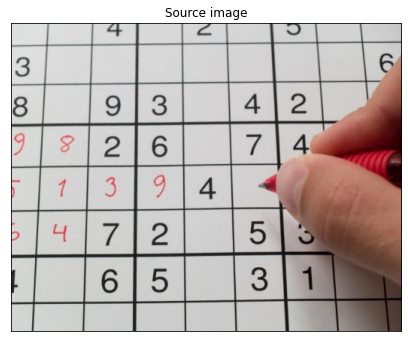

In [2]:
filename = cv.samples.findFile("../input/sudoku/sudoku.png")
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Source image")
plt.xticks([])
plt.yticks([]);

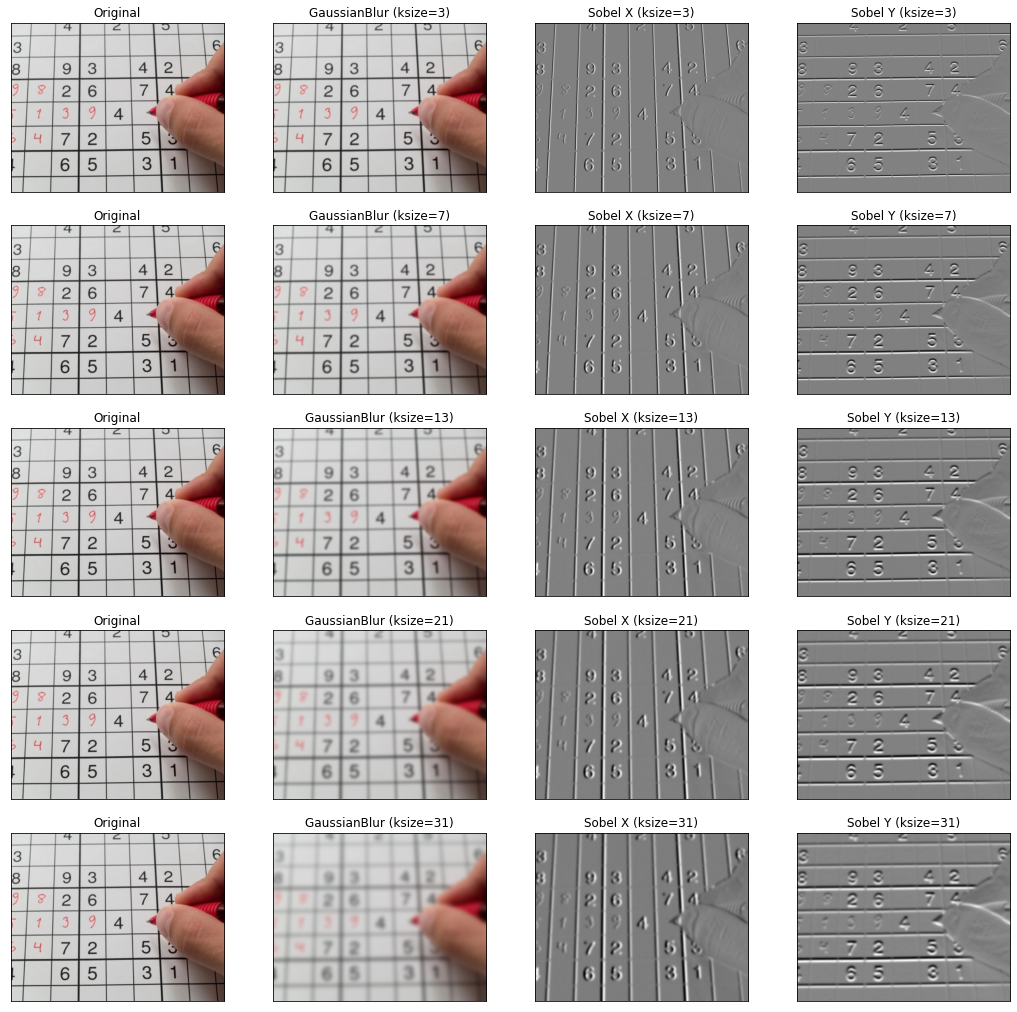

In [3]:
plt.figure(figsize=(18,18))
ks = (3, 7, 13, 21, 31)
k = 0
for n in ks:
    k += 1
    plt.subplot(len(ks), 4, k)
    plt.imshow(img, cmap = 'gray')
    plt.title(f'Original')
    plt.xticks([])
    plt.yticks([])
    
    k += 1
    plt.subplot(len(ks), 4, k)
    # размытие по Гауссу; применяется для уменьшения шума изображения и снижения детализации
    # чем больше ядро, тем сильнее размытие
    blur = cv.GaussianBlur(img, ksize=(n,n), sigmaX=0)
    plt.imshow(blur)
    plt.title(f'GaussianBlur (ksize={n})')
    plt.xticks([])
    plt.yticks([])
    
    img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    
    k += 1
    plt.subplot(len(ks), 4, k)
    # оператор Собеля (первая производная по x)
    # чем больше ядро, отчётливее видны вертикальные линии на изображении
    sobelx = cv.Sobel(img_gray, ddepth=cv.CV_64F, dx=1, dy=0, ksize=n)
    plt.imshow(sobelx, cmap='gray')
    plt.title(f'Sobel X (ksize={n})')
    plt.xticks([])
    plt.yticks([])
    
    k += 1
    plt.subplot(len(ks), 4, k)
    # оператор Собеля (первая производная по y)
    # чем больше ядро, отчётливее видны горизонтальные линии на изображении
    sobely = cv.Sobel(img_gray, ddepth=cv.CV_64F, dx=0, dy=1, ksize=n)
    plt.imshow(sobely, cmap='gray')
    plt.title(f'Sobel Y (ksize={n})')
    plt.xticks([])
    plt.yticks([])
plt.show();

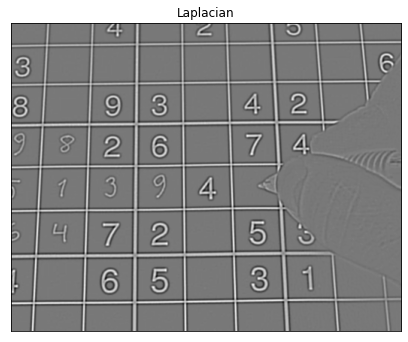

In [4]:
# оператор Лапласа; применяется в алгоритмах выделения границ
laplacian = cv.Laplacian(img_gray, ddepth=cv.CV_64F, ksize=7)
plt.imshow(laplacian, cmap='gray')
plt.title(f'Laplacian')
plt.xticks([])
plt.yticks([]);
# cv.imwrite("test.png", laplacian);

#### 1. OpenCV. Drawing модуль
1. Изобразите квадрат, прямоугольник и круг. Закрасьте их полностью
2. Изобразите фигуру произвольной формы (например, неправильный многоугольник)
3. Загрузите любую фотографию и нарисуйте любую фигуру поверх нее (например, обведите мордочку котика в прямоугольник)

In [5]:
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

RED = (255, 0, 0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

CYAN = (0, 255, 255)
MAGENTA = (255, 0, 255)
YELLOW = (255, 255, 0)

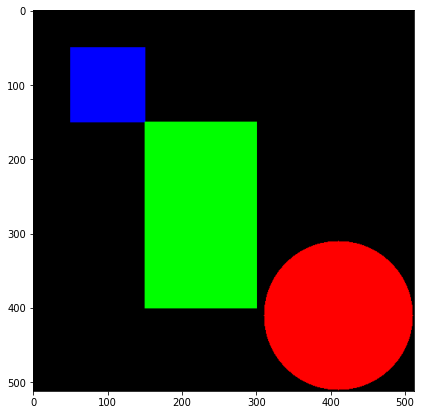

In [6]:
img = np.zeros((512, 512, 3), np.uint8)
cv.rectangle(img, (50, 50), (150, 150), BLUE, cv.FILLED)
cv.rectangle(img, (150, 150), (300, 400), GREEN, cv.FILLED)
cv.circle(img, (410, 410), 100, RED, cv.FILLED)
plt.imshow(img);

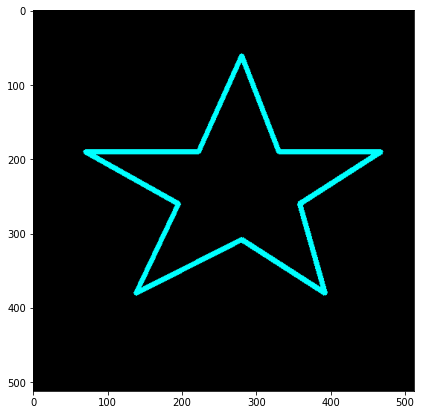

In [7]:
img = np.zeros((512, 512, 3), np.uint8)
pts = np.array([[70,190], [222,190], [280,61], [330,190], [467,190], [358,260], [392,380], [280,308], [138,380], [195,260]],
               np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img, [pts], isClosed=True, color=CYAN, thickness=5)
plt.imshow(img);

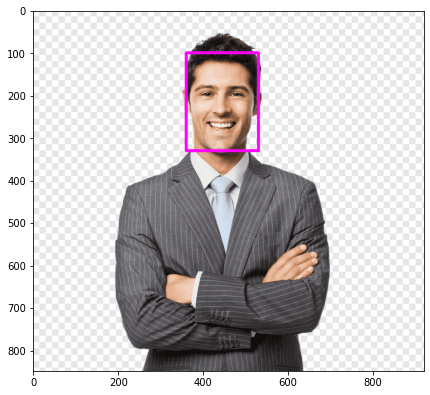

In [8]:
filename = cv.samples.findFile("../input/face-recognition/man.png")
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
pts = np.array([[360, 330],[530, 330],
                [530, 100],[360, 100]],
               np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img, [pts], isClosed=True, color=MAGENTA, thickness=5)
plt.imshow(img);